### Perform Time Series Analysis on
	1. Monthly Cola Production in Australia
	2. ice cream sales
	3. USD to INR datsets

In [5]:
import pandas as pd

# Load the datasets
cola_df = pd.read_csv('monthly-cola-production-in-austr.csv')
ice_cream_df = pd.read_csv('ice_cream.csv')
usd_inr_df = pd.read_csv('IMF_USD_INR.csv')

In [6]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Preprocessing
# 1. Cola
cola_df['Month'] = pd.to_datetime(cola_df['Month'])
cola_df.set_index('Month', inplace=True)
cola_df.sort_index(inplace=True)

# 2. Ice Cream
ice_cream_df['date'] = pd.to_datetime(ice_cream_df['date'])
ice_cream_df.set_index('date', inplace=True)
ice_cream_df.sort_index(inplace=True)

# 3. USD INR
usd_inr_df['Date'] = pd.to_datetime(usd_inr_df['Date'])
usd_inr_df.set_index('Date', inplace=True)
usd_inr_df.sort_index(inplace=True)
# Fill missing values with forward fill
usd_inr_df['INR'] = usd_inr_df['INR'].ffill()
# Drop any remaining NaNs at the start
usd_inr_df.dropna(inplace=True)

# Helper function for analysis
def analyze_timeseries(series, title, freq=None):
    print(f"--- Analysis for {title} ---")
    
    # 1. Plot
    plt.figure(figsize=(12, 6))
    plt.plot(series)
    plt.title(f'{title} - Time Series')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.savefig(f'{title.lower().replace(" ", "_")}_ts.png')
    
    # 2. Decomposition
    if freq:
        series = series.asfreq(freq)
        series = series.ffill() 
        
    try:
        decomp = seasonal_decompose(series, model='additive', period=12 if freq in ['MS', 'M'] else 365) # Assuming monthly or daily
        
        fig = decomp.plot()
        fig.set_size_inches(12, 8)
        plt.title(f'{title} - Decomposition')
        plt.savefig(f'{title.lower().replace(" ", "_")}_decomp.png')
    except Exception as e:
        print(f"Decomposition failed: {e}")

 
    adf_result = adfuller(series.dropna())
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'\t{key}: {value}')
        
  
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))
    plot_acf(series.dropna(), ax=ax[0], title=f'{title} - ACF')
    plot_pacf(series.dropna(), ax=ax[1], title=f'{title} - PACF')
    plt.tight_layout()
    plt.savefig(f'{title.lower().replace(" ", "_")}_acf_pacf.png')
    print("\n")


--- Analysis for Cola Production ---
ADF Statistic: -2.282661418787573
p-value: 0.17762099829132627
Critical Values:
	1%: -3.4447087976702284
	5%: -2.867871300049488
	10%: -2.5701423432047443


Ice Cream frequency inference: MS
--- Analysis for Ice Cream Sales ---
ADF Statistic: -1.758008775510543
p-value: 0.40149928994076167
Critical Values:
	1%: -3.4421447800270673
	5%: -2.8667429272780858
	10%: -2.5695409929766093




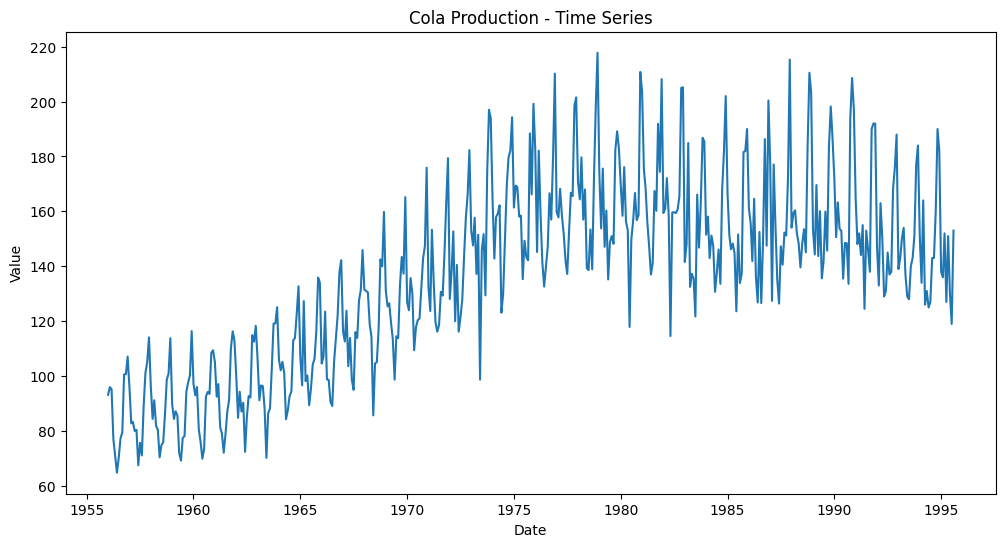

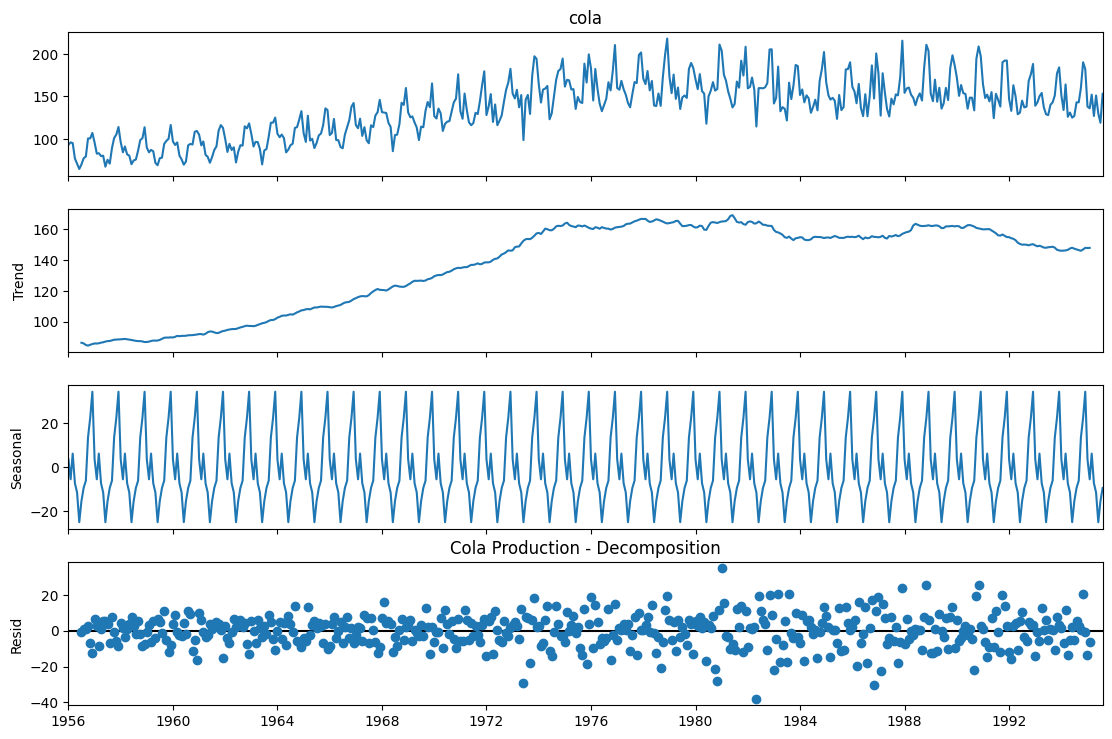

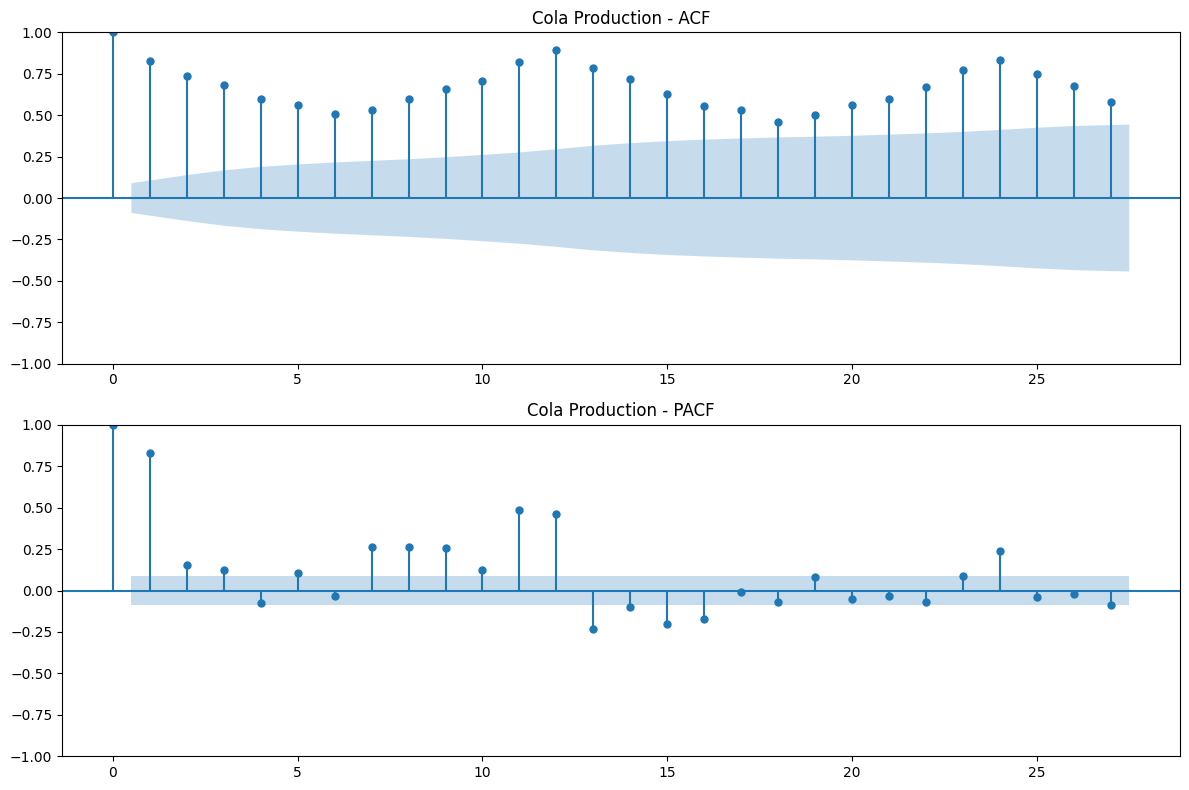

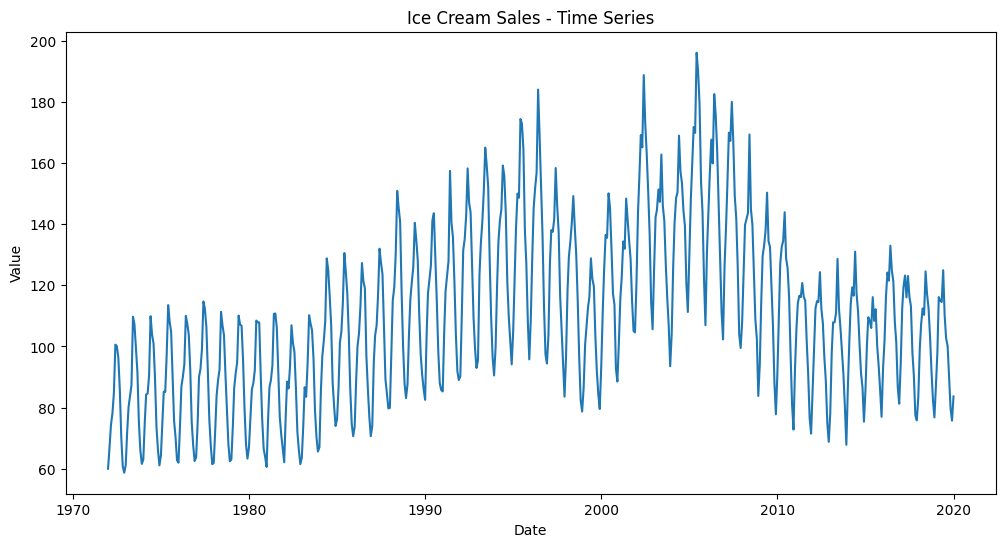

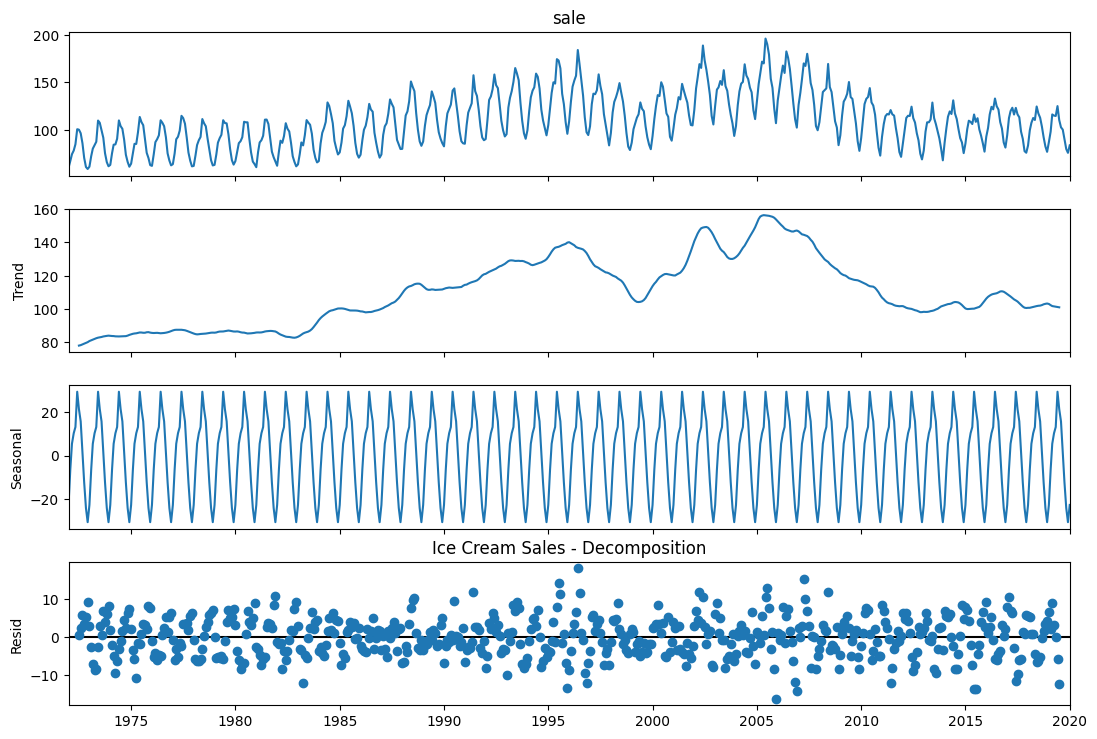

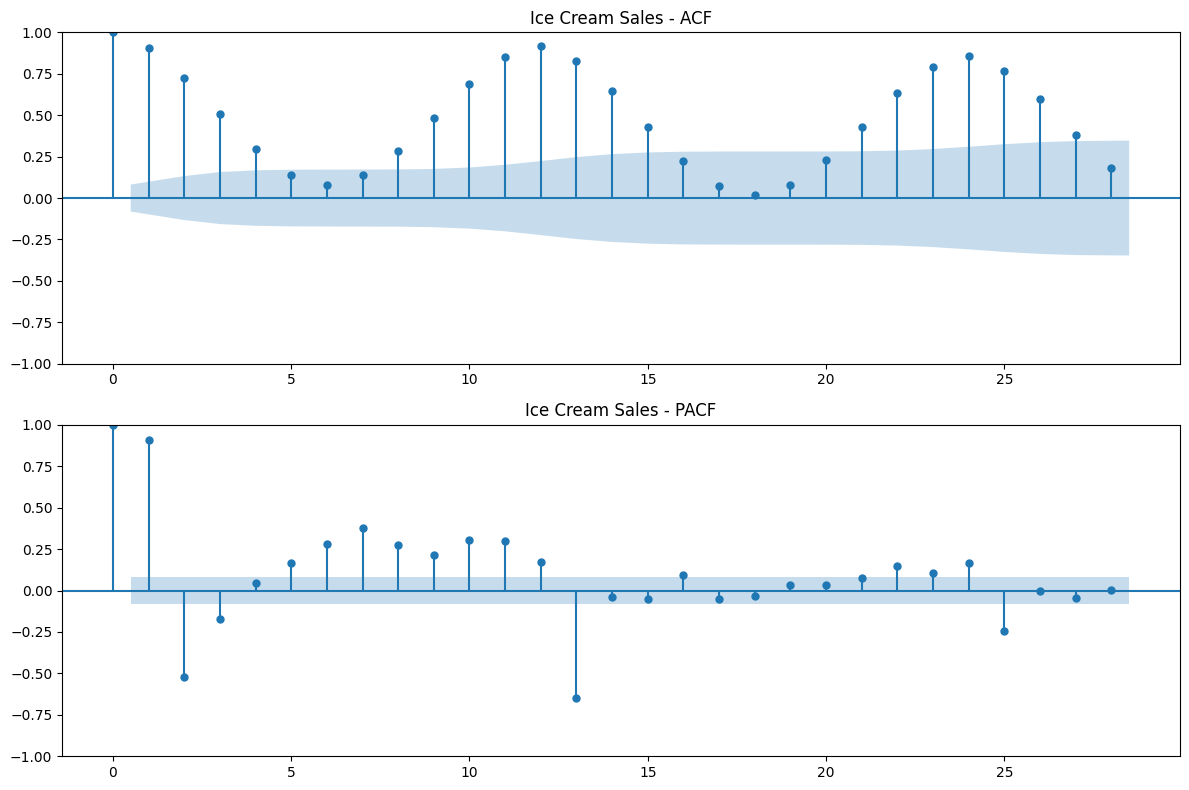

In [7]:

# Run analysis
# Cola (Monthly)
analyze_timeseries(cola_df['cola'], 'Cola Production', freq='MS')

# Ice Cream (Monthly likely, based on head)
# Check frequency of ice cream
print(f"Ice Cream frequency inference: {pd.infer_freq(ice_cream_df.index)}")
analyze_timeseries(ice_cream_df['sale'], 'Ice Cream Sales', freq='MS')

# USD INR (Daily)


USD INR frequency inference: None
--- Analysis for USD to INR ---
ADF Statistic: 0.1545698123902323
p-value: 0.9695953041505059
Critical Values:
	1%: -3.4312100457947596
	5%: -2.861920075908219
	10%: -2.566972309928175




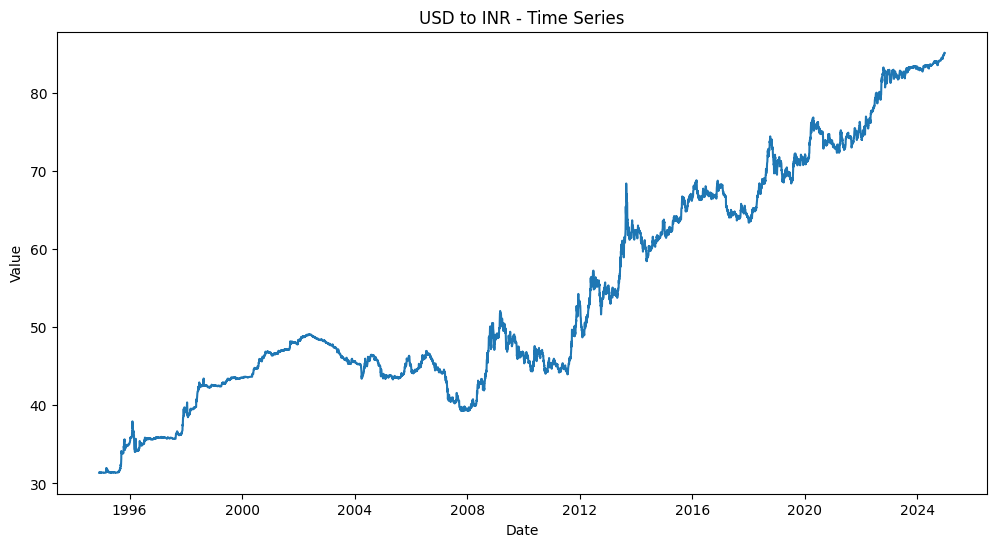

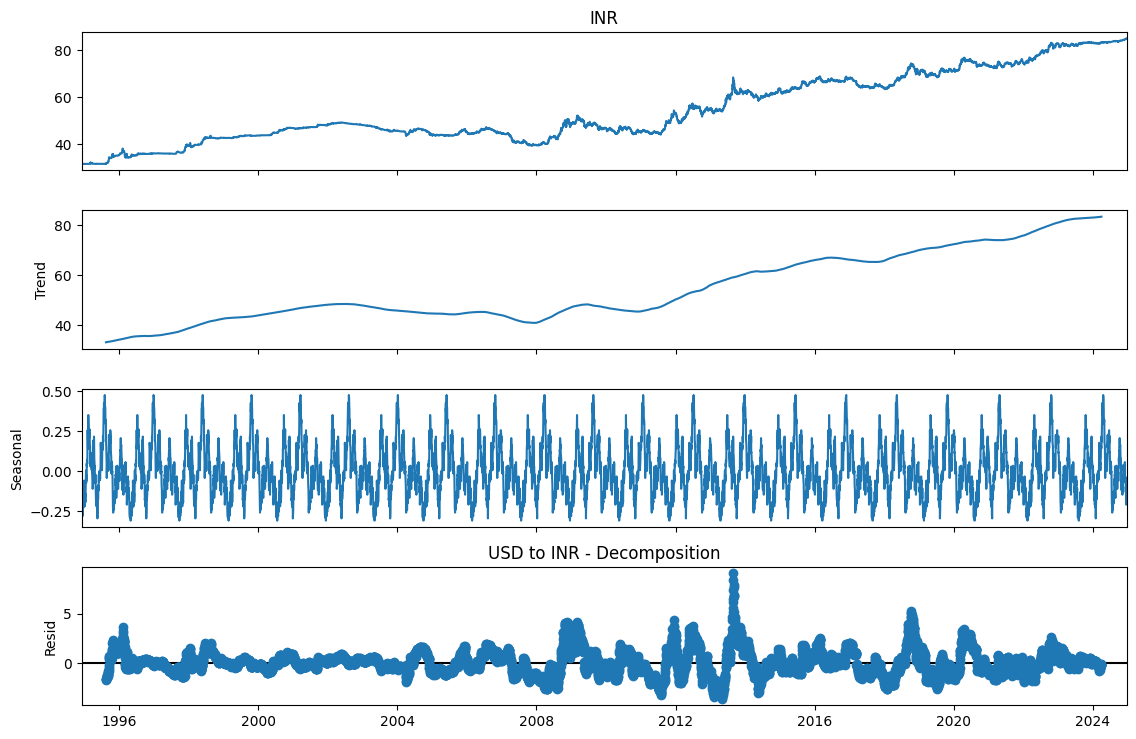

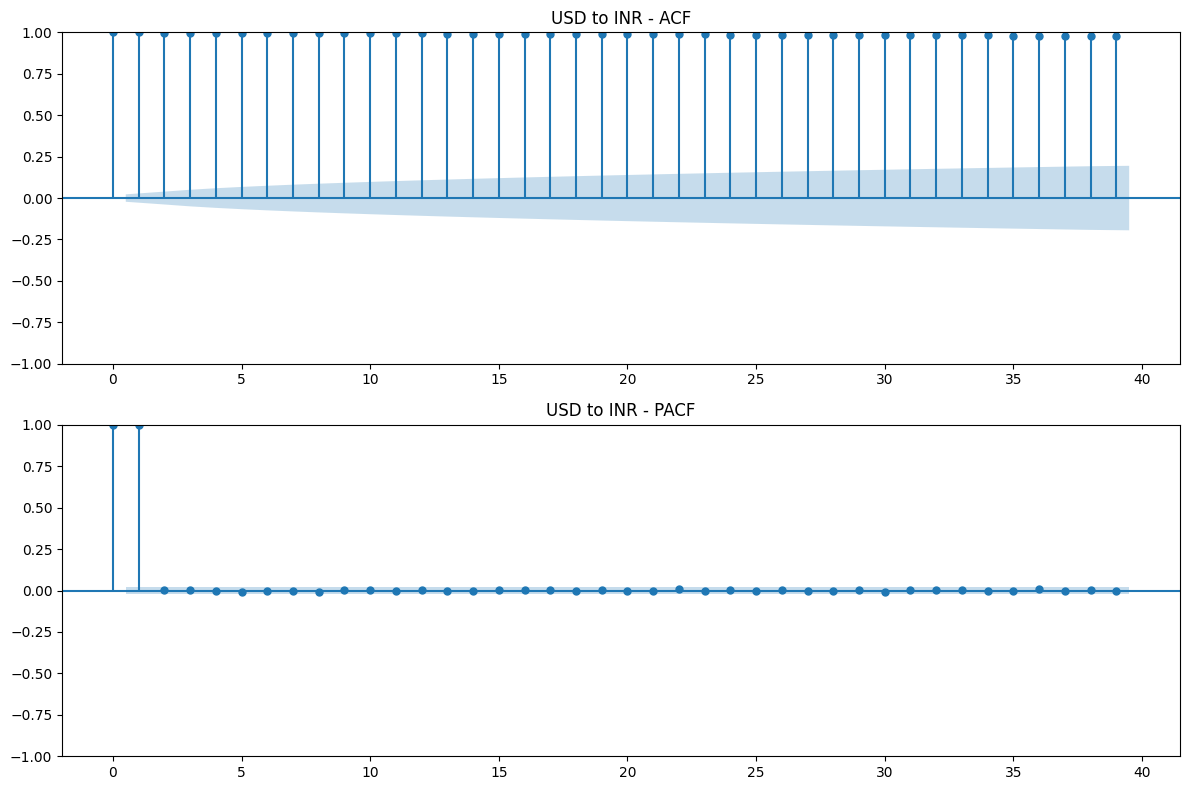

In [8]:

# Check frequency
print(f"USD INR frequency inference: {pd.infer_freq(usd_inr_df.index)}")

analyze_timeseries(usd_inr_df['INR'], 'USD to INR', freq=None)